In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./archive\EuroSAT\label_map.json
./archive\EuroSAT\test.csv
./archive\EuroSAT\train.csv
./archive\EuroSAT\validation.csv
./archive\EuroSAT\AnnualCrop\AnnualCrop_1.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_10.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_100.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1000.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1001.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1002.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1003.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1004.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1005.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1006.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1007.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1008.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1009.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_101.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1010.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1011.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1012.jpg
./archive\EuroSAT\AnnualCrop\AnnualCrop_1013.jpg
./ar

In [3]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
    
)

data_path = "./archive/EuroSAT"

data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'] 

)

Found 27000 images belonging to 10 classes.


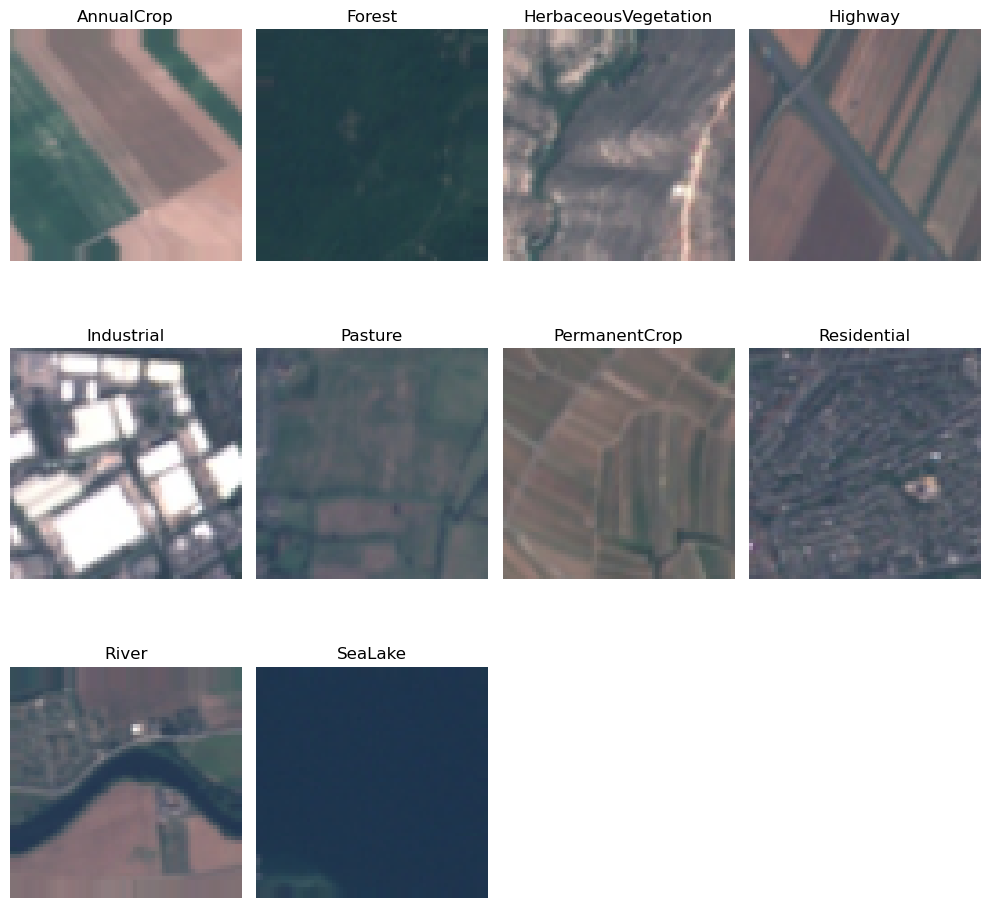

In [5]:
batch_images, batch_labels = next(data)


class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
                'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

plt.figure(figsize=(10, 10))

# Loop through each class and display one sample image
for i, label in enumerate(class_labels):
    # Find the index of the first occurrence of the label
    class_index = np.argmax(batch_labels, axis=1) == i  # True for the images of this class
    class_image = batch_images[class_index][0]  # Select the first image of that class

    # Plot the image
    plt.subplot(3, 4, i + 1) 
    plt.imshow(class_image)
    plt.title(label)
    plt.axis('off')  

plt.tight_layout() 
plt.show()


In [6]:
train_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical',
    subset='training',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
)

Found 21600 images belonging to 10 classes.


In [ ]:
validation_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)

In [7]:
test_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=1,
    subset='validation',
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
    
)

Found 5400 images belonging to 10 classes.


In [8]:
train_data


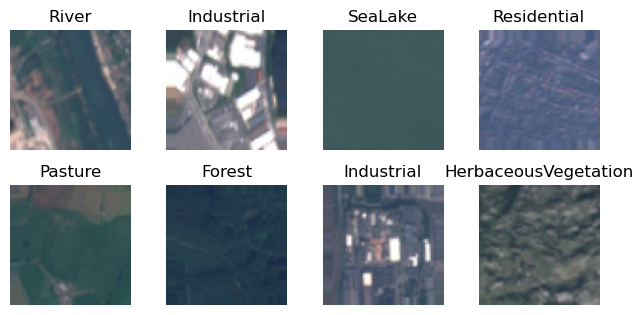

In [9]:
for i in range(8):
    plt.subplot(3, 4, i + 1)
    plt.imshow(train_data[0][0][i])
    plt.title(class_labels[np.argmax(train_data[0][1][i])])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [10]:
train_data.class_indices

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [11]:
train_data.classes


array([0, 0, 0, ..., 9, 9, 9])


Image Analysis:
--------------------------------------------------
Image shape: (64, 64, 3)
Data type: float32
Min pixel value: 0.10782229155302048
Max pixel value: 1.0
Mean pixel value: 0.44
Standard deviation: 0.15


<Figure size 1000x1000 with 0 Axes>

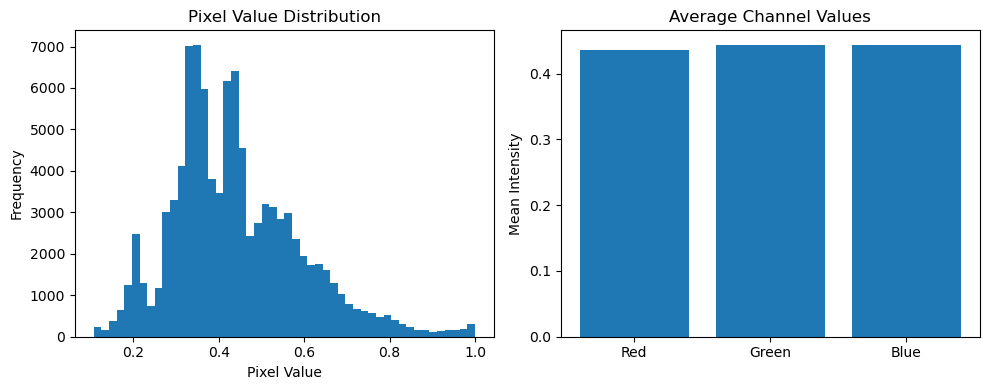

In [12]:
# Visualize sample images from each class
plt.figure(figsize=(10, 10))
classes = list(train_data.class_indices.keys())


# Analyze image characteristics
print("\nImage Analysis:")
print("-" * 50)

# Get a batch of images
batch_images, _ = next(train_data)

# Calculate and display statistics
print(f"Image shape: {batch_images[0].shape}")
print(f"Data type: {batch_images.dtype}")
print(f"Min pixel value: {np.min(batch_images)}")
print(f"Max pixel value: {np.max(batch_images)}")
print(f"Mean pixel value: {np.mean(batch_images):.2f}")
print(f"Standard deviation: {np.std(batch_images):.2f}")

# Plot pixel value distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(batch_images.ravel(), bins=50)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot average color channels
avg_channels = np.mean(batch_images, axis=(0, 1, 2))
plt.subplot(1, 2, 2)
plt.bar(['Red', 'Green', 'Blue'], avg_channels)
plt.title('Average Channel Values')
plt.ylabel('Mean Intensity')

plt.tight_layout()
plt.show()



Sharpness Analysis:
--------------------------------------------------
Average image sharpness: 0.01
Sharpness std deviation: 0.01


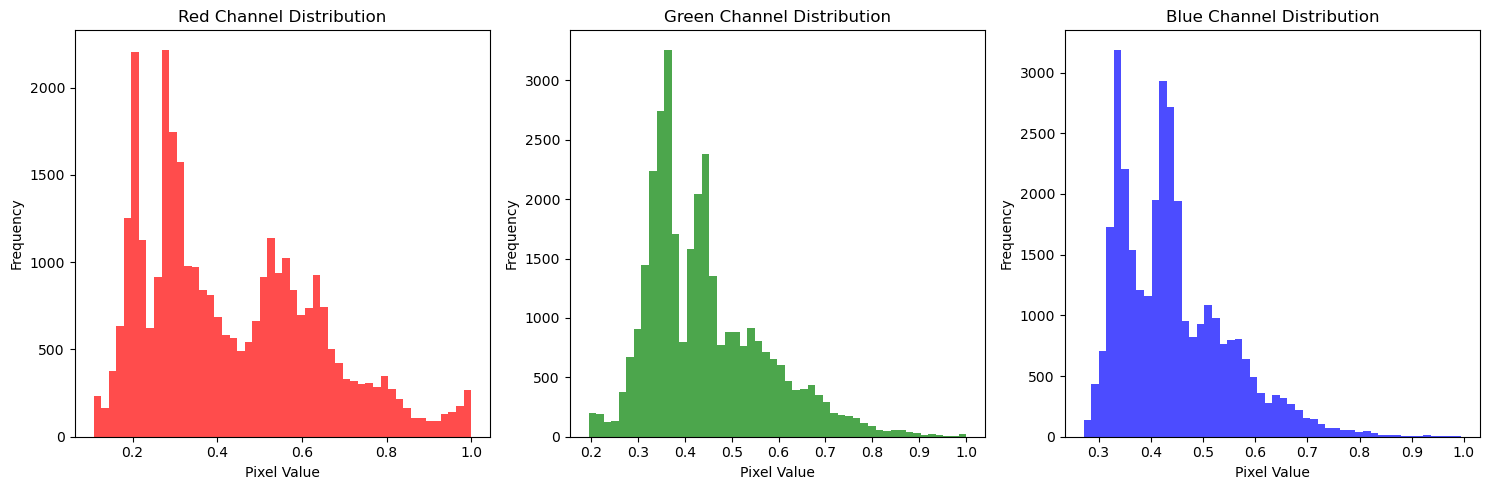


Contrast Analysis:
--------------------------------------------------
Average image contrast: 0.59
Contrast std deviation: 0.11

Aspect Ratio Analysis:
--------------------------------------------------
Image dimensions: 64x64
Aspect ratio: 1.00

Memory Usage Analysis:
--------------------------------------------------
Batch memory usage: 0.38 MB
Average memory per image: 0.05 MB


In [13]:
# Additional Analysis

# 1. Analyze image sharpness/blurriness
from scipy.ndimage import variance
print("\nSharpness Analysis:")
print("-" * 50)
sharpness_scores = []
for i in range(batch_images.shape[0]):
    gray = np.mean(batch_images[i], axis=2)  # Convert to grayscale
    sharpness = variance(gray)
    sharpness_scores.append(sharpness)

print(f"Average image sharpness: {np.mean(sharpness_scores):.2f}")
print(f"Sharpness std deviation: {np.std(sharpness_scores):.2f}")

# 2. Color distribution analysis
plt.figure(figsize=(15, 5))

# RGB Histograms
for i, color in enumerate(['Red', 'Green', 'Blue']):
    plt.subplot(1, 3, i+1)
    plt.hist(batch_images[:,:,:,i].ravel(), bins=50, color=color.lower(), alpha=0.7)
    plt.title(f'{color} Channel Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Image contrast analysis
print("\nContrast Analysis:")
print("-" * 50)
contrast_scores = []
for i in range(batch_images.shape[0]):
    img = batch_images[i]
    contrast = img.max() - img.min()
    contrast_scores.append(contrast)

print(f"Average image contrast: {np.mean(contrast_scores):.2f}")
print(f"Contrast std deviation: {np.std(contrast_scores):.2f}")

# 4. Aspect ratio analysis
print("\nAspect Ratio Analysis:")
print("-" * 50)
print(f"Image dimensions: {batch_images.shape[1]}x{batch_images.shape[2]}")
print(f"Aspect ratio: {batch_images.shape[1]/batch_images.shape[2]:.2f}")

# 5. Memory usage analysis
print("\nMemory Usage Analysis:")
print("-" * 50)
memory_size = batch_images.nbytes / (1024 * 1024)  # Convert to MB
print(f"Batch memory usage: {memory_size:.2f} MB")
print(f"Average memory per image: {memory_size/batch_images.shape[0]:.2f} MB")


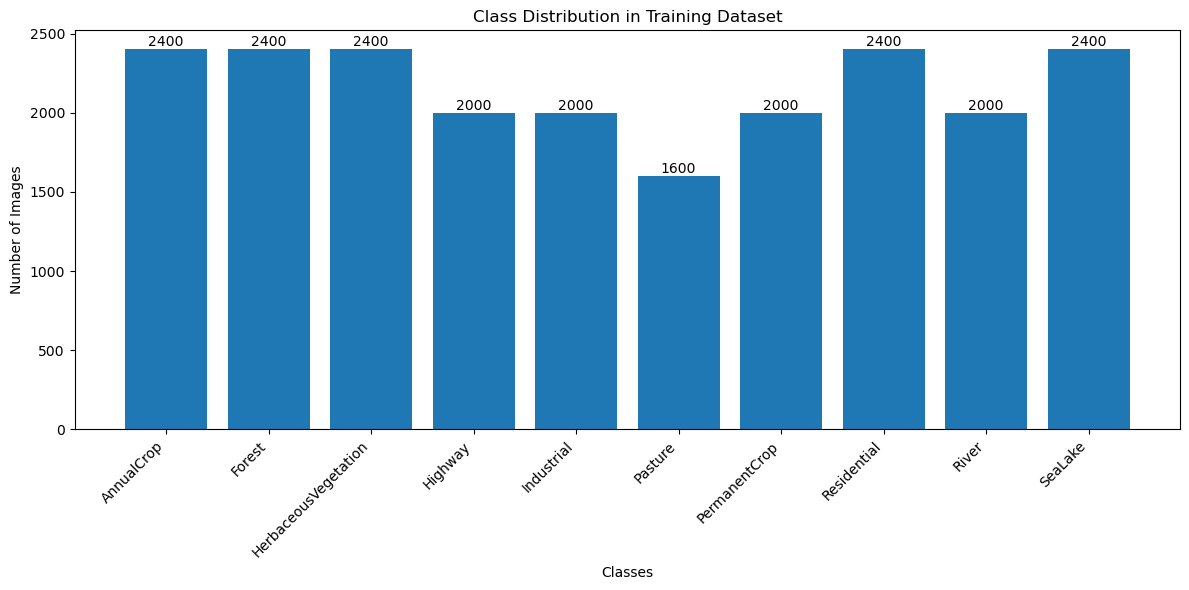


Class Distribution Percentages:
AnnualCrop: 11.11%
Forest: 11.11%
HerbaceousVegetation: 11.11%
Highway: 9.26%
Industrial: 9.26%
Pasture: 7.41%
PermanentCrop: 9.26%
Residential: 11.11%
River: 9.26%
SeaLake: 11.11%

Difference between largest and smallest class: 800 samples
Dataset is relatively balanced


In [14]:

class_counts = train_data.classes
unique, counts = np.unique(class_counts, return_counts=True)
class_distribution = dict(zip(train_data.class_indices.keys(), counts))

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xticks(rotation=45, ha='right')
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Images')

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate class imbalance metrics
total_samples = sum(counts)
class_percentages = {cls: (count/total_samples)*100 for cls, count in class_distribution.items()}

print("\nClass Distribution Percentages:")
for cls, percentage in class_percentages.items():
    print(f"{cls}: {percentage:.2f}%")

# Check if dataset is balanced
max_diff = max(counts) - min(counts)
print(f"\nDifference between largest and smallest class: {max_diff} samples")
if max_diff > 0.2 * total_samples:  # If difference is more than 20% of total samples
    print("Dataset is imbalanced - consider using class weights or data augmentation")
else:
    print("Dataset is relatively balanced")


# Functions Section 🛠️
## This section contains utility functions for model evaluation and visualization

### `evaluate_classification_model()`
- Generates confusion matrices for train and test sets 📊
- Calculates and displays classification metrics 📈
- Helps analyze model performance across different classes 🎯

--


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
def evaluate_classification_model(model, train_data, test_data):
    # Get predictions
    y_pred = model.predict(test_data)
    y_train_pred = model.predict(train_data)
    
    # Convert predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_train_pred_classes = np.argmax(y_train_pred, axis=1)
    
    # Get true labels
    y_test = test_data.classes
    y_train = train_data.classes
    
    # Get class names
    class_names = list(train_data.class_indices.keys())
    
    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Test Set Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred_classes)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)
    disp_test.plot(cmap='Blues', ax=axes[0], xticks_rotation=45)
    axes[0].set_title('Test Set Confusion Matrix')
    
    # Training Set Confusion Matrix
    cm_train = confusion_matrix(y_train, y_train_pred_classes)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)
    disp_train.plot(cmap='Blues', ax=axes[1], xticks_rotation=45)
    axes[1].set_title('Training Set Confusion Matrix')
    
    plt.tight_layout()
    plt.show()
    EV = model.evaluate(test_data)
    # Print classification reports
    train_report = classification_report(y_train, y_train_pred_classes, target_names=class_names)
    test_report = classification_report(y_test, y_pred_classes, target_names=class_names)
    print(f"""
          Test Accuracy: {EV[1]:.4f}
          Test Loss: {EV[0]:.4f}
""")
    print(f'''
-----------------------------Train Results-----------------------------
{train_report}
                        
-----------------------------Test Results-----------------------------
{test_report}
''')
    
    # Plot ROC curves (one-vs-rest)
    plt.figure(figsize=(10, 8))
    for i in range(len(class_names)):
        # Convert to binary classification problem (one-vs-rest)
        y_test_binary = (y_test == i).astype(int)
        y_pred_binary = y_pred[:, i]
        
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves (One-vs-Rest)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Base line model


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First convolutional block
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Second convolutional block
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Third convolutional block
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Calculate the size after convolutions and pooling
        self.flatten_size = 256 * 8 * 8  # For 64x64 input
        
        # Dense layers
        self.fc1 = nn.Linear(self.flatten_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)
        
    def forward(self, x):
        # First block
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.pool1(x)
        
        # Second block
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.pool2(x)
        
        # Third block
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = self.pool3(x)
        
        # Flatten
        x = x.view(-1, self.flatten_size)
        
        # Dense layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.softmax(x, dim=1)

# Create model and move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

# Print model summary
print(model)
print(f"\nUsing device: {device}")

ModuleNotFoundError: No module named 'torch'

In [17]:
from tensorflow.keras.utils import plot_model
from tensorflow import keras

CNN = keras.Sequential([
    # First convolutional block
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Third convolutional block
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


plot_model(CNN, to_file='simple_cnn_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


C:\Users\IT Department\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
CNN.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,582,346 (70.89 MB)

 Trainable params: 18,582,346 (70.89 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
'''we need to try different optimizers and loss functions'''


'we need to try different optimizers and loss functions'

In [20]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=3,              # Number of epochs with no improvement after which training will stop
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
    verbose=1               # Print messages when stopping
)


In [21]:
CNN.fit(train_data, validation_data=test_data, epochs=20, callbacks=[early_stop])


Epoch 1/20


C:\Users\IT Department\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2700/2700 ━━━━━━━━━━━━━━━━━━━━ 628s 232ms/step - accuracy: 0.3208 - loss: 1.7273 - val_accuracy: 0.6574 - val_loss: 0.9366
Epoch 2/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 624s 231ms/step - accuracy: 0.6829 - loss: 0.8904 - val_accuracy: 0.7017 - val_loss: 0.8590
Epoch 3/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 474s 176ms/step - accuracy: 0.7477 - loss: 0.7078 - val_accuracy: 0.7724 - val_loss: 0.6427
Epoch 4/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 475s 176ms/step - accuracy: 0.7826 - loss: 0.6059 - val_accuracy: 0.7646 - val_loss: 0.6587
Epoch 5/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 475s 176ms/step - accuracy: 0.8091 - loss: 0.5466 - val_accuracy: 0.7789 - val_loss: 0.6136
Epoch 6/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 624s 231ms/step - accuracy: 0.8316 - loss: 0.4912 - val_accuracy: 0.8206 - val_loss: 0.5129
Epoch 7/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 494s 183ms/step - accuracy: 0.8429 - loss: 0.4486 - val_accuracy: 0.8022 - val_loss: 0.5671
Epoch 8/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 521s 193ms/step - accuracy: 0.8

In [85]:
# # Save the trained model using pickle
# import pickle


# # Save the model to a file
# with open('', 'wb') as f:
#     pickle.dump(CNN, f)


In [23]:
# Save the trained model using tensorflow
CNN.save('cnn_model.h5')

# Save the trained model using keras
keras.models.save_model(CNN, 'cnn_model.keras')

5400/5400 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 184s 68ms/step


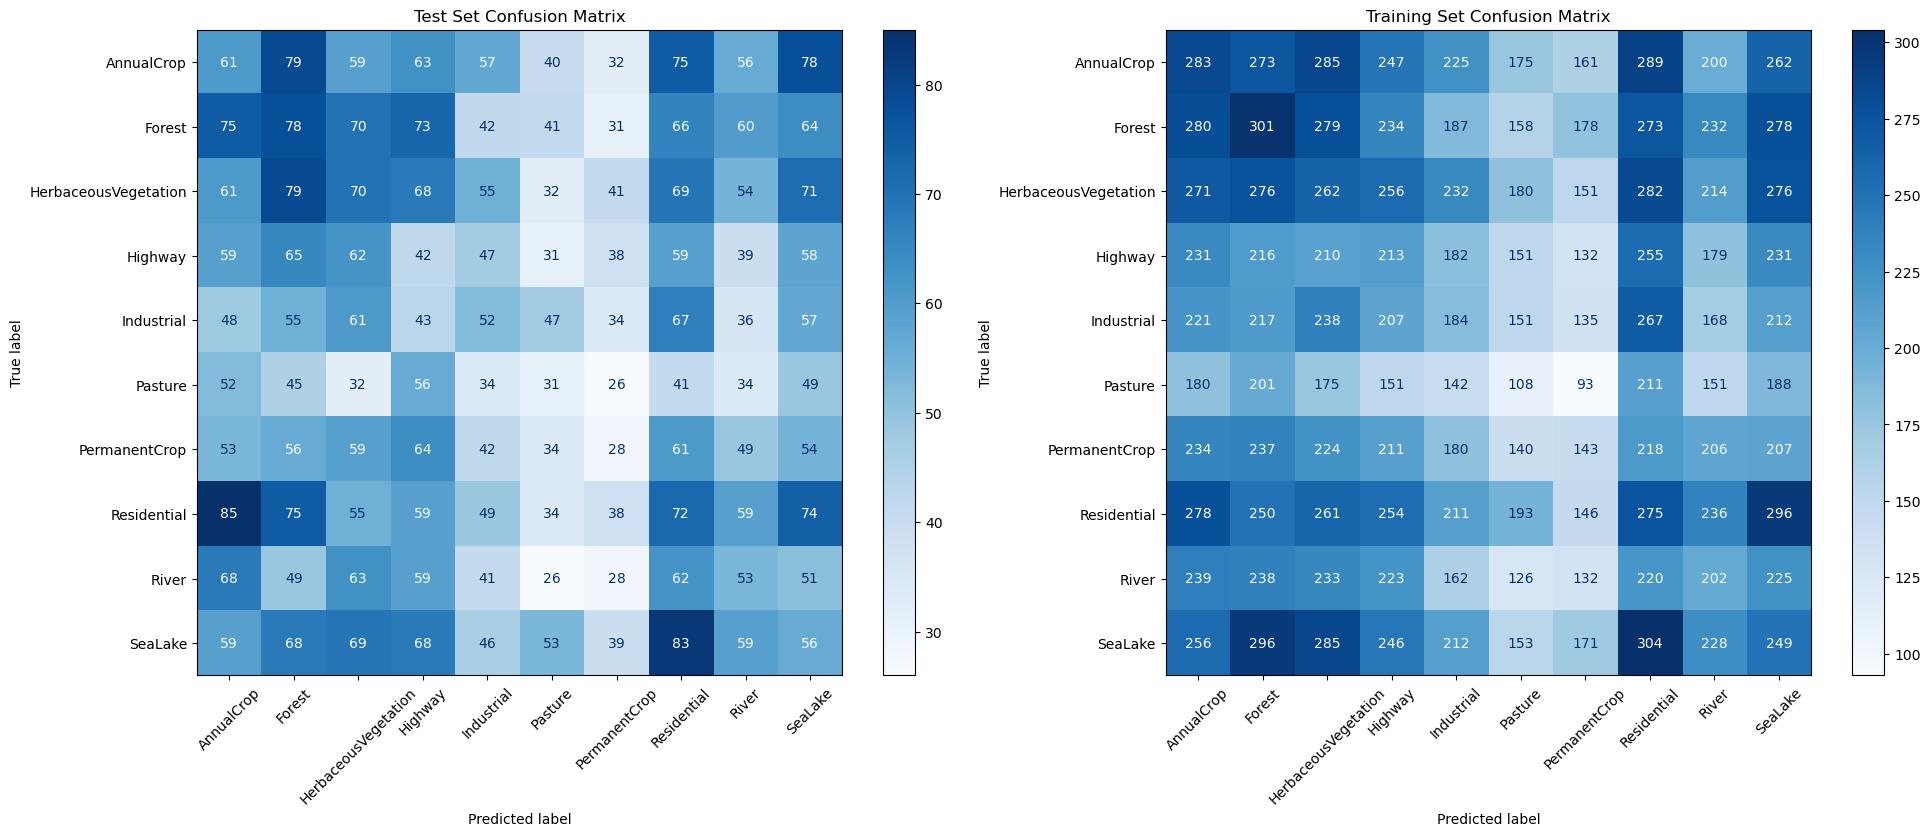

5400/5400 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.8554 - loss: 0.4666

          Test Accuracy: 0.8498
          Test Loss: 0.4631


-----------------------------Train Results-----------------------------
                      precision    recall  f1-score   support

          AnnualCrop       0.11      0.12      0.12      2400
              Forest       0.12      0.13      0.12      2400
HerbaceousVegetation       0.11      0.11      0.11      2400
             Highway       0.10      0.11      0.10      2000
          Industrial       0.10      0.09      0.09      2000
             Pasture       0.07      0.07      0.07      1600
       PermanentCrop       0.10      0.07      0.08      2000
         Residential       0.11      0.11      0.11      2400
               River       0.10      0.10      0.10      2000
             SeaLake       0.10      0.10      0.10      2400

            accuracy                           0.10     21600
           macro avg       0.10      0.1

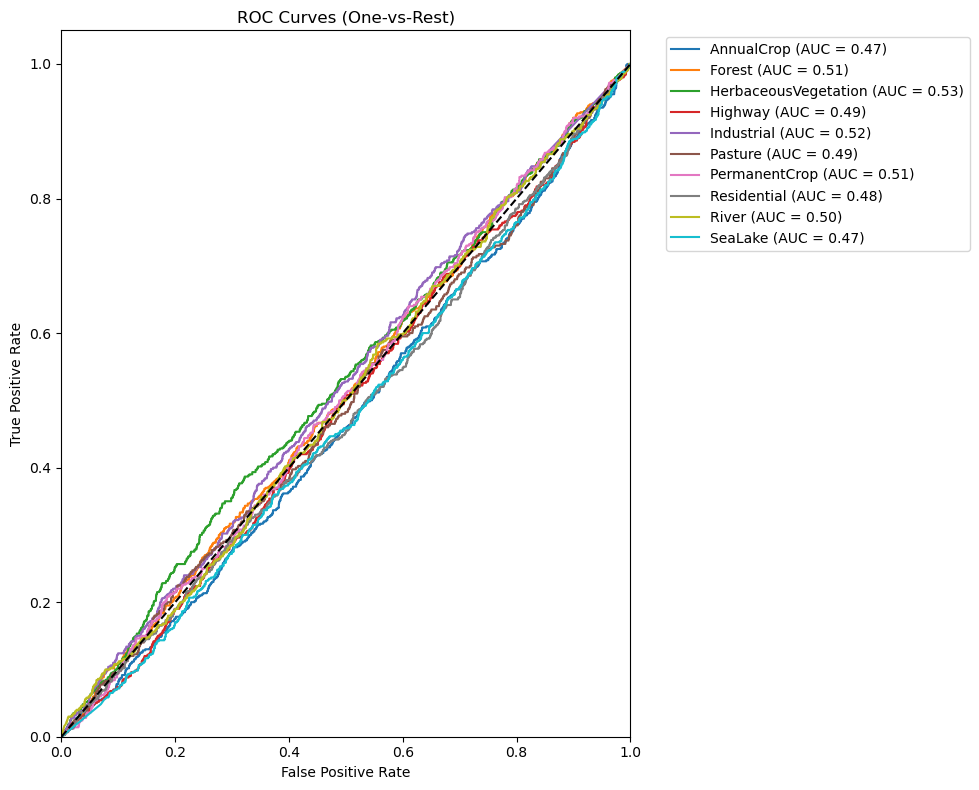

In [24]:
evaluate_classification_model(CNN, train_data, test_data)


5400/5400 ━━━━━━━━━━━━━━━━━━━━ 53s 10ms/step


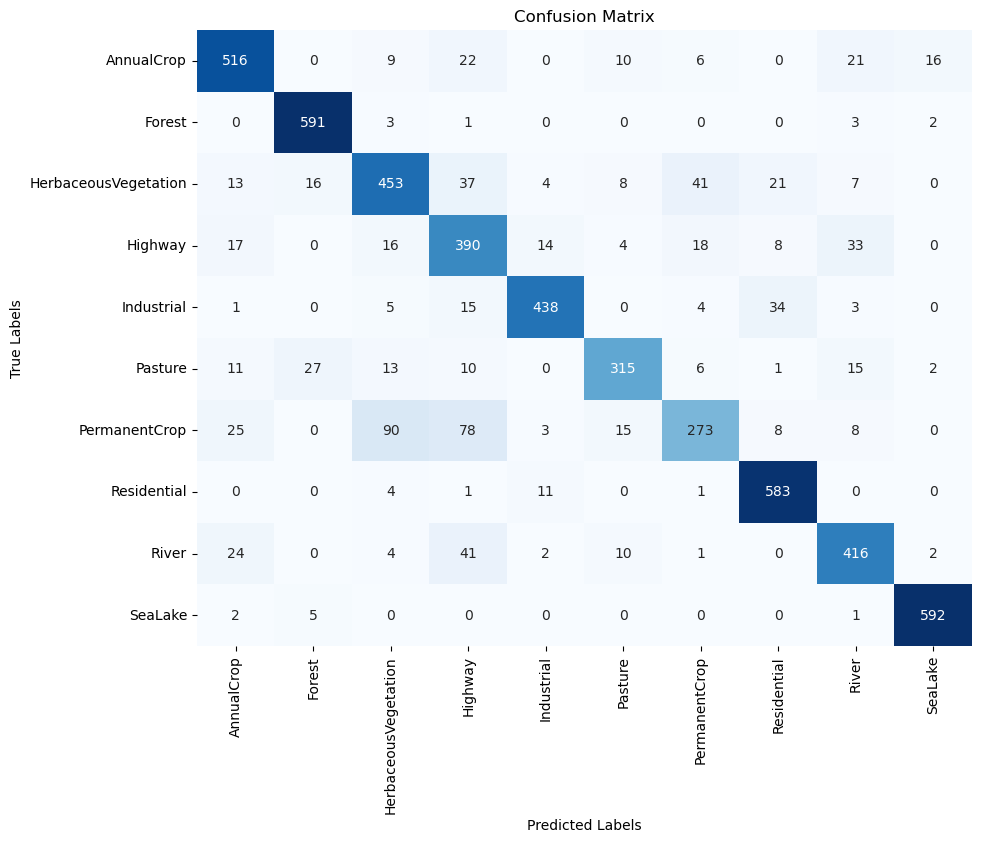

Classification Report: 
                       precision    recall  f1-score   support

          AnnualCrop       0.85      0.86      0.85       600
              Forest       0.92      0.98      0.95       600
HerbaceousVegetation       0.76      0.76      0.76       600
             Highway       0.66      0.78      0.71       500
          Industrial       0.93      0.88      0.90       500
             Pasture       0.87      0.79      0.83       400
       PermanentCrop       0.78      0.55      0.64       500
         Residential       0.89      0.97      0.93       600
               River       0.82      0.83      0.83       500
             SeaLake       0.96      0.99      0.98       600

            accuracy                           0.85      5400
           macro avg       0.84      0.84      0.84      5400
        weighted avg       0.85      0.85      0.84      5400



In [25]:


class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
                'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

y_true = []
for i in range(test_data.samples // test_data.batch_size):
    _, batch_labels = next(test_data)
    y_true.extend(np.argmax(batch_labels, axis=-1))

# Generate predictions for test data
steps = int(np.ceil(test_data.samples / test_data.batch_size))  # Convert to int
y_probab = CNN.predict(test_data, steps=steps)

# Generate predicted classes for test data
y_pred = np.argmax(y_probab, axis=-1)

# Generate confusion matrix with class labels
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report with class labels
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report: \n", report)


In [28]:
pip install gradio

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/57.2 MB ? eta -:--:--
   - -------------------------------------- 1.6/57.2 MB 8.4 MB/s eta 0:00:07
   -- ------------------------------------- 3.9/57.2 MB 9.8 MB/s eta 0:00:06
   ---- ----------------------------------- 6.3/57.2 MB 10.7 MB/s eta 0:00:05
   ----- ---------------------------------- 7.6/57.2 MB 9.6 MB/s eta 0:00:06
   ------ --------------------------------- 9.2/57.2 MB 9.4 MB/s eta 0:00:06
   ------- -------------------------------- 11.0/57.2 MB 9.2 MB/s eta 0:00:06
   --------- ------------------------------ 13.1/57.2 MB 9.2 MB/s eta 0:00:05
   ---------- ----------------------------- 14.9/57.2 MB 9.3 MB/s eta 0:00:05
   ----------- ---------------------------- 16.8/57.2 MB 9.2 MB/s eta 0:00:05
   ------------- -------------------------- 18.6/57.2 MB 9.2 MB/s eta 0:00:05
   -------------- ------------------------- 20.7/57.2 MB 9.3 MB/s eta 0:00:0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [29]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image
# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
                'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
# Function to make predictions
def predict_image(img):
    # Preprocess the image
    img = img.resize((64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    # Make prediction
    predictions = CNN.predict(img_array)
    predicted_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions)
    return f"Predicted: {predicted_class} with confidence {confidence:.2f}"
# Create a Gradio interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.components.Image(type="pil"),
    outputs=gr.components.Textbox(),
    title="EuroSAT Land Classification",
    description="Upload an image to classify it into one of the EuroSAT land use classes."
)
# Launch the interface
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://5f909a448d6027becc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [48]:
CNN.evaluate(test_data)

5400/5400 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8484 - loss: 0.4561


[0.4849121570587158, 0.8431481719017029]

## CNN --- Base Model 
## CNN_Dropout --- Dropout Model and Early Stopping
## CNN_BatchNorm --- Batch Normalization and Early Stopping
## CNN_DataAug --- Data Augmentation and Early Stopping
## CNN_transfer --- Transfer Learning and Early Stopping


# ----------------------------------------------------------------------------------------------------------------

# CNN_Dropout --- Dropout Model and Early Stopping


In [36]:
CNN_Dropout = keras.Sequential([
    # First convolutional block
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    
    # Second convolutional block
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    
    # Third convolutional block
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    
    # Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

CNN_Dropout.summary()

c:\Users\IT Department\.conda\envs\iron_hack\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,922 (3.14 MB)

 Trainable params: 822,922 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=5,              # Number of epochs with no improvement after which training will stop
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
    verbose=1               # Print messages when stopping
)
CNN_Dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

CNN_Dropout.fit(train_data, validation_data=test_data, epochs=20, callbacks=[early_stop])

Epoch 1/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 196s 72ms/step - accuracy: 0.3374 - loss: 1.7543 - val_accuracy: 0.5685 - val_loss: 1.2323
Epoch 2/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.5429 - loss: 1.2768 - val_accuracy: 0.6811 - val_loss: 0.9158
Epoch 3/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.5949 - loss: 1.1312 - val_accuracy: 0.6793 - val_loss: 0.8788
Epoch 4/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.6255 - loss: 1.0508 - val_accuracy: 0.5533 - val_loss: 1.1915
Epoch 5/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.6584 - loss: 0.9678 - val_accuracy: 0.5719 - val_loss: 1.1263
Epoch 6/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.6635 - loss: 0.9429 - val_accuracy: 0.7085 - val_loss: 0.8162
Epoch 7/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.6633 - loss: 0.9233 - val_accuracy: 0.6883 - val_loss: 0.8318
Epoch 8/20
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.6822 

5400/5400 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step


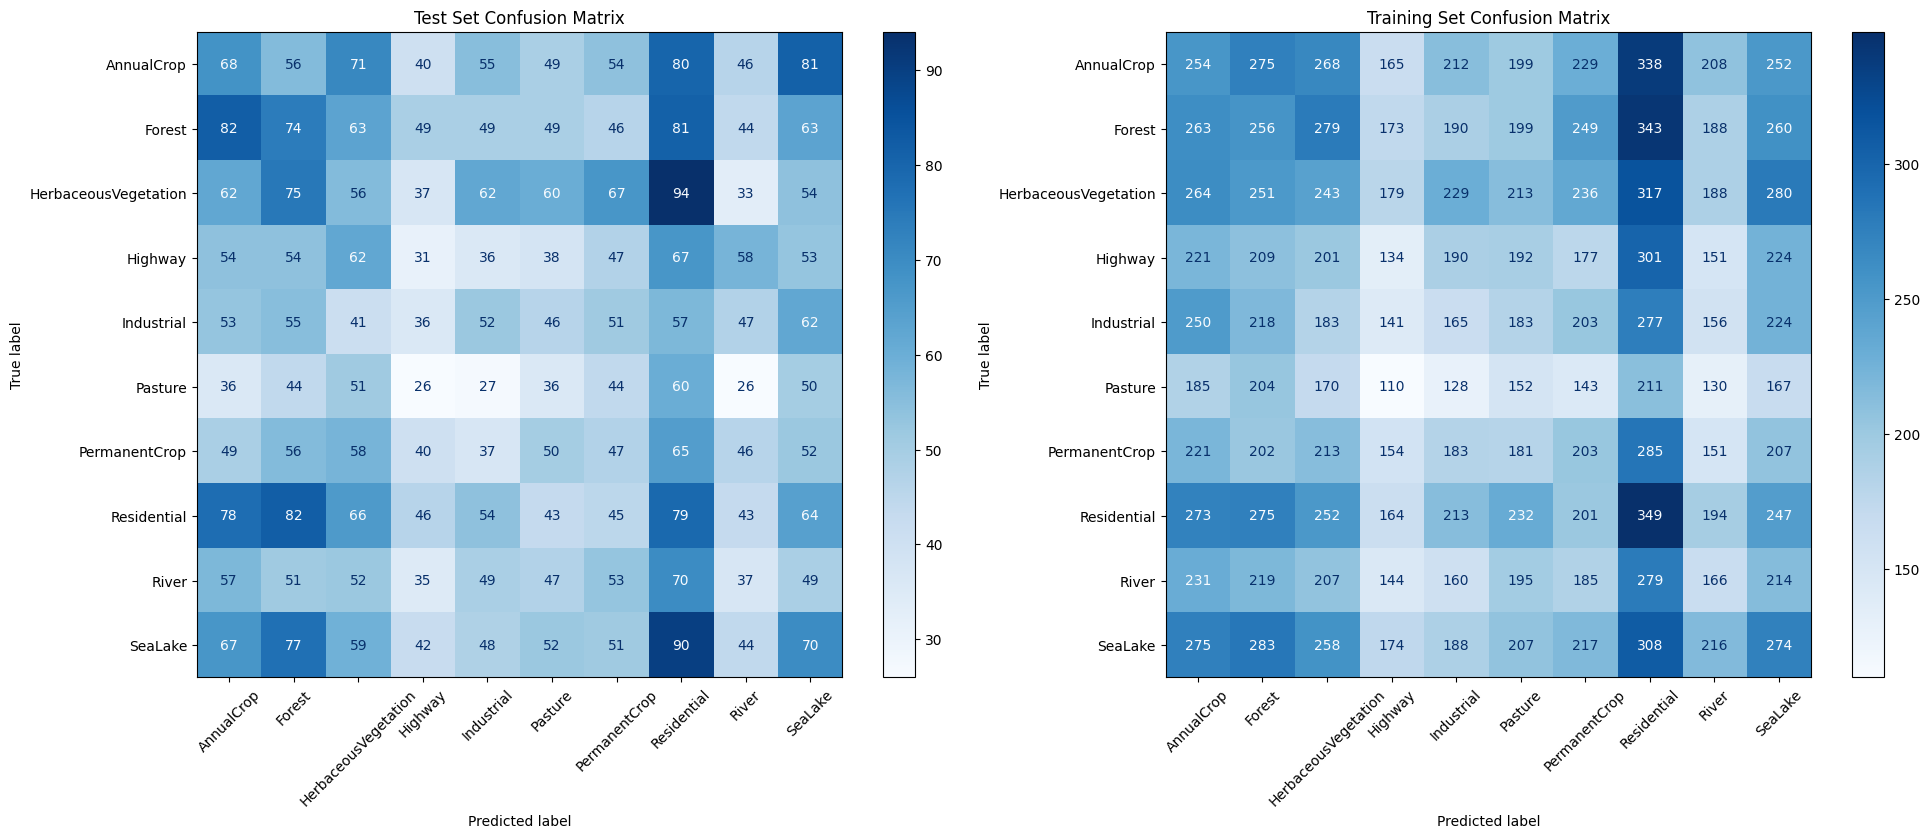


-----------------------------Train Results-----------------------------
                      precision    recall  f1-score   support

          AnnualCrop       0.10      0.11      0.11      2400
              Forest       0.11      0.11      0.11      2400
HerbaceousVegetation       0.11      0.10      0.10      2400
             Highway       0.09      0.07      0.08      2000
          Industrial       0.09      0.08      0.09      2000
             Pasture       0.08      0.10      0.09      1600
       PermanentCrop       0.10      0.10      0.10      2000
         Residential       0.12      0.15      0.13      2400
               River       0.09      0.08      0.09      2000
             SeaLake       0.12      0.11      0.12      2400

            accuracy                           0.10     21600
           macro avg       0.10      0.10      0.10     21600
        weighted avg       0.10      0.10      0.10     21600

                        
-----------------------------Te

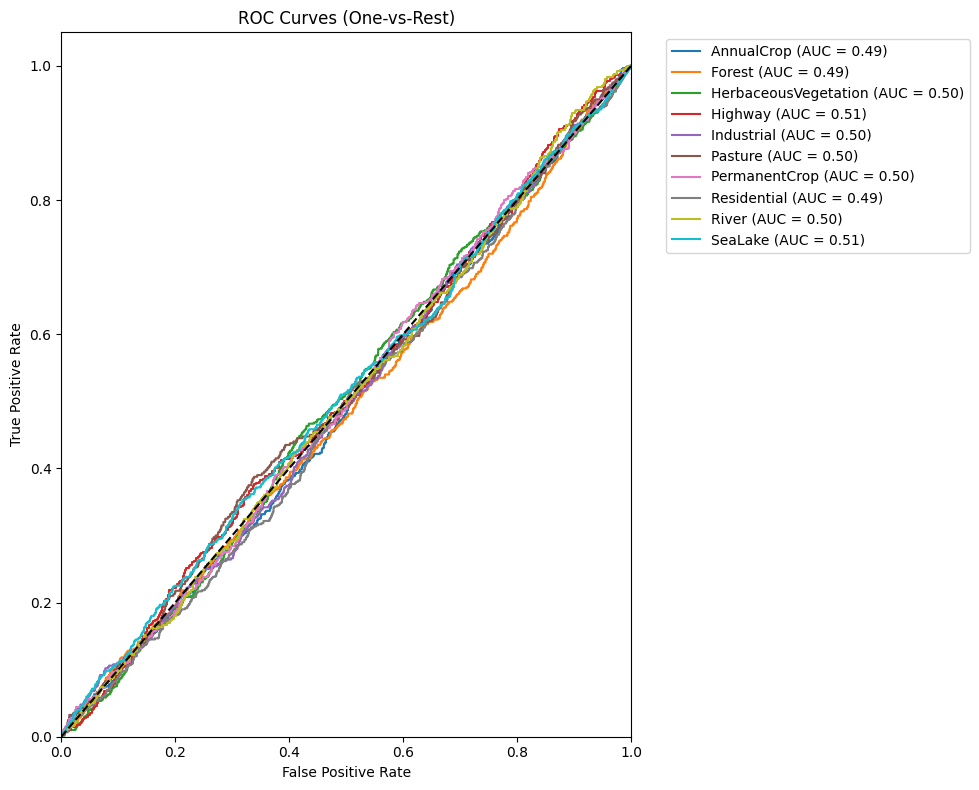

In [40]:
evaluate_classification_model(CNN_Dropout, train_data, test_data)


## CNN_BatchNorm --- Batch Normalization and Early Stopping

In [ ]:
CNN_BatchNorm = keras.Sequential([
    # First convolutional block with batch normalization
    keras.layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block with batch normalization 
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten and dense layers with batch normalization
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax')
])

CNN_BatchNorm.summary()

# Compile and train with early stopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

CNN_BatchNorm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

CNN_BatchNorm.fit(train_data, validation_data=test_data, epochs=20, callbacks=[early_stop])

# Evaluate the model
evaluate_classification_model(CNN_BatchNorm, train_data, test_data)

